<a href="https://colab.research.google.com/github/cmvaleria/IronCristian/blob/master/One%20Hot%20Encoder_%20L_4_03_answers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/CURR-v3.X-JAN2023/UNIT4/DAY2/4.03 Bias-variance-tradeoff: underfitting and overfitting/HC4A_unit4_403.csv') # this file is in files_for_lesson_and_activities folder
data.head()

,HV1,IC1,IC5,CARDPROM,NUMPRM12,NGIFTALL,TIMELAG,year,GENDER,HOMEOWNR,DOMAIN_letters,RFA_frequency,RFA_monetary,AVGGIFT
0,604,245,12536,8,15,3,3.000000,37.570799,F,other,T,3,G,15.000000
1,800,378,16743,12,11,4,15.000000,37.570799,other,other,S,2,F,8.250000
2,1395,283,11965,6,8,1,8.117886,37.570799,other,other,S,1,F,20.000000
3,846,440,14630,6,11,1,8.117886,59.000000,F,H,T,1,F,23.000000
4,1394,302,8510,18,14,7,7.000000,45.000000,F,H,U,3,G,16.714286


In [ ]:
data.shape

(10000, 14)

In [ ]:
# get data
# clean data, dropping any rows and columns that need to be dropped (1)
# select features (could postpone this)
# X/y split
# Train/Test split
# split both Train and Test in numericals and categoricals
# transformations on numericals:
#     fit ONLY on numericals_train
#     transform BOTH numericals_train and numericals_test
# encoding categoricals
#     fit ONLY on categricals_train
#     transform BOTH categoricals_train and categoricals_test
# combine numericals_train and categoricals_train into train_processed
# combine numericals_test and categoricals_test into test_processed
# define model/s
# fit model on train_processed
# evaluate (score) model on train_processed test_processed

# save model and transformers/encoders/scalers (2)
# save all our functions

# main.py
# For unseen data:
# drop columns and rows according to the criteria used in (1)
# split in numericals and categoricals
# transform numericals and encode categoricals using transformers/encoders saved in (2)
# make predictions using model saved in (2)

In [ ]:
X = data.drop(['AVGGIFT'],axis=1)
y = data['AVGGIFT']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [ ]:
numericals_train = X_train.select_dtypes(np.number)
numericals_test = X_test.select_dtypes(np.number)
numericals_train.head()

,HV1,IC1,IC5,CARDPROM,NUMPRM12,NGIFTALL,TIMELAG,year,RFA_frequency
1191,463,208,8898,10,11,2,16.0,54.000000,1
4458,790,353,15730,32,13,10,7.0,45.000000,1
1131,497,320,12383,31,9,21,4.0,25.000000,1
9562,572,199,10944,16,13,8,2.0,58.000000,1
6579,716,401,14903,32,11,36,6.0,37.570799,1


In [ ]:
y_train.head()

1191    15.000000
4458     9.700000
1131     5.571429
9562    22.500000
6579    11.388889
Name: AVGGIFT, dtype: float64

In [ ]:
from sklearn.preprocessing import StandardScaler

transformer = StandardScaler() # Any scaler wanted.
transformer.fit(numericals_train)
numericals_train_standardized = transformer.transform(numericals_train)
numericals_test_standardized = transformer.transform(numericals_test)

In [ ]:
numericals_train_standardized = pd.DataFrame(numericals_train_standardized, columns = numericals_train.columns)
numericals_test_standardized  = pd.DataFrame(numericals_test_standardized,  columns = numericals_test.columns  )
display(numericals_train_standardized.head())
display(numericals_test_standardized.head())

,HV1,IC1,IC5,CARDPROM,NUMPRM12,NGIFTALL,TIMELAG,year,RFA_frequency
0,-0.633989,-0.819815,-0.807338,-0.976130,-0.414344,-0.893225,1.307816,1.226740,-0.857768
1,-0.283648,0.069333,-0.004106,1.587377,0.040979,0.052934,-0.191780,0.555293,-0.857768
2,-0.597562,-0.133025,-0.397610,1.470854,-0.869668,1.353904,-0.691646,-0.936810,-0.857768
3,-0.517208,-0.875004,-0.566792,-0.276992,0.040979,-0.183606,-1.024890,1.525161,-0.857768
4,-0.362930,0.363671,-0.101336,1.587377,-0.414344,3.127953,-0.358402,0.001037,-0.857768


,HV1,IC1,IC5,CARDPROM,NUMPRM12,NGIFTALL,TIMELAG,year,RFA_frequency
0,-0.446497,-0.402836,-0.584427,-1.558745,-0.642006,-1.011495,-0.005516,0.001037,-0.857768
1,1.154142,0.087729,0.835925,-1.442222,-0.869668,-0.893225,0.474707,-1.459046,0.076911
2,-0.456140,-0.660382,-0.699057,-0.626561,0.040979,-0.656685,0.141463,0.107662,0.076911
3,-0.788267,-1.065097,-0.806985,1.470854,-1.097330,3.482763,-1.024890,0.001037,1.946267
4,0.105263,-0.102365,-0.052545,-0.043946,0.268641,0.289474,0.308085,0.001037,1.946267


In [ ]:
categoricals_train= X_train.select_dtypes(object)
categoricals_test= X_test.select_dtypes(object)
categoricals_train.head()

,GENDER,HOMEOWNR,DOMAIN_letters,RFA_monetary
1191,M,H,T,F
4458,M,H,C,F
1131,F,H,U,E
9562,F,U,T,G
6579,M,U,T,F


In [ ]:
categoricals_train['DOMAIN_letters'].unique()

array(['T', 'C', 'U', 'S', 'R'], dtype=object)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='error', drop='first')
encoder.fit(categoricals_train)

# Here, after applying the encoder the resulting array will have lots of 0's. When this happens, by default 
# sklearn returns a new type of variable called "np.sparse_array". This new type of variable saves a lot of
# memory because it only stores the location of the non 0 values for each row. However, we can't visualize it
# To avoid this, we need to use .toarray()
categoricals_train_encoded = encoder.transform(categoricals_train).toarray()
categoricals_test_encoded  = encoder.transform(categoricals_test).toarray()

# Here, the encoder will automatically assign new columns names based on the possible values of each column as
# "column_name" + "_" + "value". Those values were NOT PRESENT in the original categoricals_train df. Therefore,
# we can't simply add the option "columns = categoricals_train df" because we will have a missmatch. However,
# the new column names are stored in the encoder and we can access to them with the method: encoder.get_feature_names_out()
# that we need to assign to the option "columns=" when we define the df. 
categoricals_train_encoded = pd.DataFrame(categoricals_train_encoded, columns = encoder.get_feature_names_out())
categoricals_test_encoded  = pd.DataFrame(categoricals_test_encoded, columns = encoder.get_feature_names_out())
display(categoricals_train_encoded.head())
display(categoricals_test_encoded.head())

,GENDER_M,GENDER_other,HOMEOWNR_U,HOMEOWNR_other,DOMAIN_letters_R,DOMAIN_letters_S,DOMAIN_letters_T,DOMAIN_letters_U,RFA_monetary_E,RFA_monetary_F,RFA_monetary_G
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


,GENDER_M,GENDER_other,HOMEOWNR_U,HOMEOWNR_other,DOMAIN_letters_R,DOMAIN_letters_S,DOMAIN_letters_T,DOMAIN_letters_U,RFA_monetary_E,RFA_monetary_F,RFA_monetary_G
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
encoder.transform(categoricals_train)

<7000x11 sparse matrix of type '<class 'numpy.float64'>'
	with 18421 stored elements in Compressed Sparse Row format>

In [ ]:
encoder.transform(categoricals_train).toarray()

array([[1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [ ]:
# We can have access to which labels the encoder kept for each column with the method: .categories_ which
# returns an array of arrays. In other words, this aray contains as many rows as categorical columns in the 
# df. Each row contains the accepted values for the corresponding column.
encoder.categories_

[array(['F', 'M', 'other'], dtype=object),
 array(['H', 'U', 'other'], dtype=object),
 array(['C', 'R', 'S', 'T', 'U'], dtype=object),
 array(['D', 'E', 'F', 'G'], dtype=object)]

In [ ]:
# numericals_train_standardized
categoricals_train_encoded

,GENDER_M,GENDER_other,HOMEOWNR_U,HOMEOWNR_other,DOMAIN_letters_R,DOMAIN_letters_S,DOMAIN_letters_T,DOMAIN_letters_U,RFA_monetary_E,RFA_monetary_F,RFA_monetary_G
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
6995,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
6996,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
6997,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
6998,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
# Now, we concatenate the numericals and the categoricals df.
# Please note that the numericals have been standarized first and then the numericals and the categoricals
# will not be in the same range and this will hurt the model performance!!!
# we do this deliberately for illustrative purposes. The correct way will be to standarize the full dataframe. 
X_train = pd.concat([numericals_train_standardized,categoricals_train_encoded],axis=1)
X_test = pd.concat([numericals_test_standardized,categoricals_test_encoded],axis=1)

In [ ]:
pd.concat([numericals_train_standardized,categoricals_train_encoded],axis=1)

,HV1,IC1,IC5,CARDPROM,NUMPRM12,NGIFTALL,TIMELAG,year,RFA_frequency,GENDER_M,GENDER_other,HOMEOWNR_U,HOMEOWNR_other,DOMAIN_letters_R,DOMAIN_letters_S,DOMAIN_letters_T,DOMAIN_letters_U,RFA_monetary_E,RFA_monetary_F,RFA_monetary_G
0,-0.633989,-0.819815,-0.807338,-0.976130,-0.414344,-0.893225,1.307816,1.226740,-0.857768,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,-0.283648,0.069333,-0.004106,1.587377,0.040979,0.052934,-0.191780,0.555293,-0.857768,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-0.597562,-0.133025,-0.397610,1.470854,-0.869668,1.353904,-0.691646,-0.936810,-0.857768,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,-0.517208,-0.875004,-0.566792,-0.276992,0.040979,-0.183606,-1.024890,1.525161,-0.857768,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,-0.362930,0.363671,-0.101336,1.587377,-0.414344,3.127953,-0.358402,0.001037,-0.857768,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,-0.197938,0.486312,0.202815,1.470854,-0.642006,0.644284,-1.358133,0.001037,-0.857768,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
6996,-0.501138,-0.206610,-0.389968,-1.092653,-0.642006,-0.893225,0.308085,2.495028,-0.857768,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
6997,-0.376858,0.001880,-0.153066,-0.276992,-0.186683,-0.538416,-0.358402,0.182268,0.076911,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
6998,0.192044,-0.672646,-0.116032,-1.558745,-0.186683,-1.011495,-0.005516,0.001037,-0.857768,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
np.concatenate([numericals_train_standardized,categoricals_train_encoded],axis=1)

array([[-0.63398867, -0.81981527, -0.80733815, ...,  0.        ,
         1.        ,  0.        ],
       [-0.28364782,  0.0693325 , -0.00410627, ...,  0.        ,
         1.        ,  0.        ],
       [-0.59756179, -0.13302527, -0.39760994, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [-0.37685777,  0.00187991, -0.15306628, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.19204433, -0.67264598, -0.11603202, ...,  0.        ,
         1.        ,  0.        ],
       [-0.17972409, -0.49481643,  0.51402062, ...,  0.        ,
         0.        ,  0.        ]])

In [ ]:
# We're going to use the K-NN model for REGRESSION. Remember that this model can be used for
# regression and classification. However in sklearn, this model has a different name if it's
# used for classification or regression. For regression is called:KNeighborsRegressor
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html

from sklearn.neighbors import KNeighborsRegressor

# This method has several options like:
# n_neighbors -> number ob neighbours to make the prediction: K
# weights -> wether or not weigth each neighbour according to the distance to the observation to be predicted
# p -> power of the Minkowski distance (default value = 2, which corresponds to Euclidian distance)
# However, for sake of simplicity we're only going to play with the option: n_neighbors
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [ ]:
# Here .score will return the R2 of the model
knn_score = knn.score(X_test, y_test)
print("The R2 of the k-NN model is {:.2f}".format(knn_score))

The R2 of the k-NN model is 0.30


In [ ]:
#ACTIVITY 1 - Build a linear model on the same data and compare the scores

In [ ]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [ ]:
lm_score_test = lm.score(X_test, y_test)
print("The R2 of the linnear model is {:.2f}".format(lm_score_test))
# End Activity 1

The R2 of the linnear model is 0.45


# Choosing k

In [ ]:
list(range(2,15))

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [ ]:
#knn_models = [] # knn_models = [ model_k_2, model_k_3,...]
knn_models = {} # keys = k_distance_p, value = model
weights = ["uniform","distance"]
p_values = [1,2,3]
scores = {}
for k in range(2,15):
    for weight in weights:
        for value in p_values:
            model = KNeighborsRegressor(n_neighbors=k,weights=weight,p=value)
            print("Training the k-NN model with {} neighbours with weights {} and p set to {}...".format(k,weight,value))
            model.fit(X_train, y_train)
            #knn_models.append(model)
            knn_models[str(k)+"_"+weight+"_"+str(value)] = model
            scores[str(k)+"_"+weight+"_"+str(value)] = model.score(X_test, y_test)
            print()

Training the k-NN model with 2 neighbours with weights uniform and p set to 1...

Training the k-NN model with 2 neighbours with weights uniform and p set to 2...

Training the k-NN model with 2 neighbours with weights uniform and p set to 3...

Training the k-NN model with 2 neighbours with weights distance and p set to 1...

Training the k-NN model with 2 neighbours with weights distance and p set to 2...

Training the k-NN model with 2 neighbours with weights distance and p set to 3...

Training the k-NN model with 3 neighbours with weights uniform and p set to 1...

Training the k-NN model with 3 neighbours with weights uniform and p set to 2...

Training the k-NN model with 3 neighbours with weights uniform and p set to 3...

Training the k-NN model with 3 neighbours with weights distance and p set to 1...

Training the k-NN model with 3 neighbours with weights distance and p set to 2...

Training the k-NN model with 3 neighbours with weights distance and p set to 3...

Training t

In [ ]:
knn_models

{'2_uniform_1': KNeighborsRegressor(n_neighbors=2, p=1),
 '2_uniform_2': KNeighborsRegressor(n_neighbors=2),
 '2_uniform_3': KNeighborsRegressor(n_neighbors=2, p=3),
 '2_distance_1': KNeighborsRegressor(n_neighbors=2, p=1, weights='distance'),
 '2_distance_2': KNeighborsRegressor(n_neighbors=2, weights='distance'),
 '2_distance_3': KNeighborsRegressor(n_neighbors=2, p=3, weights='distance'),
 '3_uniform_1': KNeighborsRegressor(n_neighbors=3, p=1),
 '3_uniform_2': KNeighborsRegressor(n_neighbors=3),
 '3_uniform_3': KNeighborsRegressor(n_neighbors=3, p=3),
 '3_distance_1': KNeighborsRegressor(n_neighbors=3, p=1, weights='distance'),
 '3_distance_2': KNeighborsRegressor(n_neighbors=3, weights='distance'),
 '3_distance_3': KNeighborsRegressor(n_neighbors=3, p=3, weights='distance'),
 '4_uniform_1': KNeighborsRegressor(n_neighbors=4, p=1),
 '4_uniform_2': KNeighborsRegressor(n_neighbors=4),
 '4_uniform_3': KNeighborsRegressor(n_neighbors=4, p=3),
 '4_distance_1': KNeighborsRegressor(n_neigh

In [ ]:
knn_models['14_distance_2'].score(X_test,y_test)

0.4404398099096394

In [ ]:
knn_models.keys()

dict_keys(['2_uniform_1', '2_uniform_2', '2_uniform_3', '2_distance_1', '2_distance_2', '2_distance_3', '3_uniform_1', '3_uniform_2', '3_uniform_3', '3_distance_1', '3_distance_2', '3_distance_3', '4_uniform_1', '4_uniform_2', '4_uniform_3', '4_distance_1', '4_distance_2', '4_distance_3', '5_uniform_1', '5_uniform_2', '5_uniform_3', '5_distance_1', '5_distance_2', '5_distance_3', '6_uniform_1', '6_uniform_2', '6_uniform_3', '6_distance_1', '6_distance_2', '6_distance_3', '7_uniform_1', '7_uniform_2', '7_uniform_3', '7_distance_1', '7_distance_2', '7_distance_3', '8_uniform_1', '8_uniform_2', '8_uniform_3', '8_distance_1', '8_distance_2', '8_distance_3', '9_uniform_1', '9_uniform_2', '9_uniform_3', '9_distance_1', '9_distance_2', '9_distance_3', '10_uniform_1', '10_uniform_2', '10_uniform_3', '10_distance_1', '10_distance_2', '10_distance_3', '11_uniform_1', '11_uniform_2', '11_uniform_3', '11_distance_1', '11_distance_2', '11_distance_3', '12_uniform_1', '12_uniform_2', '12_uniform_3',

In [ ]:
knn_scores = {}

for key in knn_models.keys():
    knn_scores[key] = knn_models[key].score(X_test, y_test)

knn_scores

{'2_uniform_1': 0.32486321526822626,
 '2_uniform_2': 0.08400495399969721,
 '2_uniform_3': 0.05432416047754007,
 '2_distance_1': 0.2822309846336374,
 '2_distance_2': 0.10404255134009643,
 '2_distance_3': 0.06634335645869271,
 '3_uniform_1': 0.38498469059255525,
 '3_uniform_2': 0.29718806878016457,
 '3_uniform_3': 0.18637536077404693,
 '3_distance_1': 0.3683185112060229,
 '3_distance_2': 0.2968270085883242,
 '3_distance_3': 0.19830991101207562,
 '4_uniform_1': 0.43674255136551654,
 '4_uniform_2': 0.3395722851009114,
 '4_uniform_3': 0.2891593596475147,
 '4_distance_1': 0.4301008831210178,
 '4_distance_2': 0.34371777448297025,
 '4_distance_3': 0.2954985355751675,
 '5_uniform_1': 0.4577891179115844,
 '5_uniform_2': 0.3778272658200412,
 '5_uniform_3': 0.35176470199561105,
 '5_distance_1': 0.45679324021537415,
 '5_distance_2': 0.38503314707055136,
 '5_distance_3': 0.3569853373272619,
 '6_uniform_1': 0.46135191234071005,
 '6_uniform_2': 0.4170496634670523,
 '6_uniform_3': 0.38663500055131295,


In [ ]:
for score in scores:
    print(score)

2_uniform_1
2_uniform_2
2_uniform_3
2_distance_1
2_distance_2
2_distance_3
3_uniform_1
3_uniform_2
3_uniform_3
3_distance_1
3_distance_2
3_distance_3
4_uniform_1
4_uniform_2
4_uniform_3
4_distance_1
4_distance_2
4_distance_3
5_uniform_1
5_uniform_2
5_uniform_3
5_distance_1
5_distance_2
5_distance_3
6_uniform_1
6_uniform_2
6_uniform_3
6_distance_1
6_distance_2
6_distance_3
7_uniform_1
7_uniform_2
7_uniform_3
7_distance_1
7_distance_2
7_distance_3
8_uniform_1
8_uniform_2
8_uniform_3
8_distance_1
8_distance_2
8_distance_3
9_uniform_1
9_uniform_2
9_uniform_3
9_distance_1
9_distance_2
9_distance_3
10_uniform_1
10_uniform_2
10_uniform_3
10_distance_1
10_distance_2
10_distance_3
11_uniform_1
11_uniform_2
11_uniform_3
11_distance_1
11_distance_2
11_distance_3
12_uniform_1
12_uniform_2
12_uniform_3
12_distance_1
12_distance_2
12_distance_3
13_uniform_1
13_uniform_2
13_uniform_3
13_distance_1
13_distance_2
13_distance_3
14_uniform_1
14_uniform_2
14_uniform_3
14_distance_1
14_distance_2
14_distan

In [ ]:
for key in list(scores.keys()):
    print("The R2 of the k-nn model with {} neighbours, weights set to {}, and p set to {} on the TEST set was: {:.3f}".format(key.split("_")[0],key.split("_")[1],key.split("_")[2],scores[key]))

The R2 of the k-nn model with 2 neighbours, weights set to uniform, and p set to 1 on the TEST set was: 0.325
The R2 of the k-nn model with 2 neighbours, weights set to uniform, and p set to 2 on the TEST set was: 0.084
The R2 of the k-nn model with 2 neighbours, weights set to uniform, and p set to 3 on the TEST set was: 0.054
The R2 of the k-nn model with 2 neighbours, weights set to distance, and p set to 1 on the TEST set was: 0.282
The R2 of the k-nn model with 2 neighbours, weights set to distance, and p set to 2 on the TEST set was: 0.104
The R2 of the k-nn model with 2 neighbours, weights set to distance, and p set to 3 on the TEST set was: 0.066
The R2 of the k-nn model with 3 neighbours, weights set to uniform, and p set to 1 on the TEST set was: 0.385
The R2 of the k-nn model with 3 neighbours, weights set to uniform, and p set to 2 on the TEST set was: 0.297
The R2 of the k-nn model with 3 neighbours, weights set to uniform, and p set to 3 on the TEST set was: 0.186
The R2 

In [ ]:
#  score | k | weight | p

In [ ]:
values = []
for key in list(scores.keys()):
    values.append( ( scores[key] , int(key.split("_")[0]), key.split("_")[1], key.split("_")[2]) )

df = pd.DataFrame(values, columns=["score","K","weight","p"])
df

,score,K,weight,p
0,0.324863,2,uniform,1
1,0.084005,2,uniform,2
2,0.054324,2,uniform,3
3,0.282231,2,distance,1
4,0.104043,2,distance,2
...,...,...,...,...
73,0.426771,14,uniform,2
74,0.402218,14,uniform,3
75,0.487271,14,distance,1
76,0.440440,14,distance,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   score   78 non-null     float64
 1   K       78 non-null     int64  
 2   weight  78 non-null     object 
 3   p       78 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 2.6+ KB


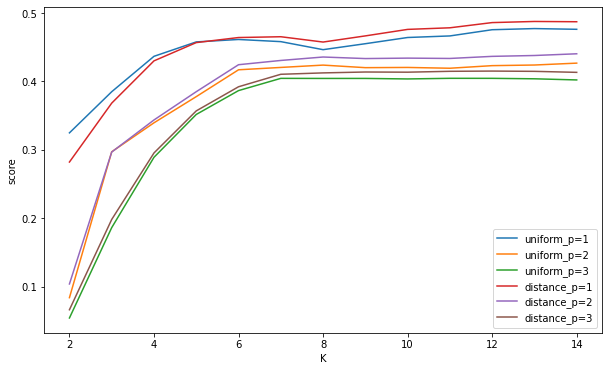

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
sns.lineplot(data=df[(df['weight']=="uniform") & (df['p']=="1")],  x="K",y="score", markers="x",label="uniform_p=1" ,ax = ax)
sns.lineplot(data=df[(df['weight']=="uniform") & (df['p']=="2") ], x="K",y="score",markers="o", label="uniform_p=2" ,ax = ax)
sns.lineplot(data=df[(df['weight']=="uniform") & (df['p']=="3") ], x="K",y="score",markers="o", label="uniform_p=3",ax = ax)
sns.lineplot(data=df[(df['weight']=="distance") & (df['p']=="1")],  x="K",y="score", markers="x", label="distance_p=1" ,ax = ax)
sns.lineplot(data=df[(df['weight']=="distance") & (df['p']=="2") ], x="K",y="score",markers="o", label="distance_p=2",ax = ax)
sns.lineplot(data=df[(df['weight']=="distance") & (df['p']=="3") ], x="K",y="score",markers="o", label="distance_p=3",ax = ax)
plt.legend()
plt.show()

Text(0, 0.5, 'R2')

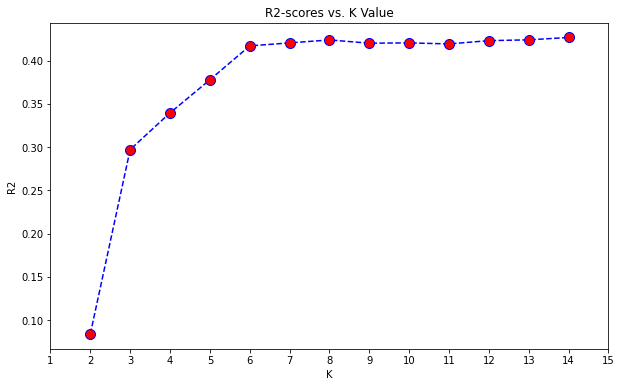

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(2,15),scores,color = 'blue', linestyle='dashed',
         marker='o', markerfacecolor='red', markersize=10)
plt.title('R2-scores vs. K Value')
plt.xticks(range(1,16))
#plt.gca().invert_yaxis() 
plt.xlabel('K')
plt.ylabel('R2')

In [ ]:
# ACTIVITY 2
# If you think a little bit about it, the number of neighbors might be very important for our results, but will it be the only parameter that matters? 

0.4120695421492011

In [ ]:
# Get and print the R2 score of the model with 6 neighbours.
print("The R2 for the k-nn model with 6 neighbours is {:.2f}".format(scores[4]))

The R2 for the k-nn model with 6 neighbours is 0.10


In [ ]:
# Once we know the optimal setting for a K-NN model, we could train the model again as shown below for one case
# Train a new k-NN model setting the value of weights = "distance" and keeping 6 neighbours.
# Compare the R2 of both models

distance_model = KNeighborsRegressor(n_neighbors=6, weights = "distance")
distance_model.fit(X_train, y_train)
score = distance_model.score(X_test, y_test)
print("The R2 for the k-nn model with 6 neighbours is {:.2f}".format(scores[4]))
print("The R2 for the k-nn model with 6 neighbours, weighted by distance is {:.2f}".format(score))

The R2 for the k-nn model with 6 neighbours is 0.10
The R2 for the k-nn model with 6 neighbours, weighted by distance is 0.42


However, training again the model is stupid because we already stored all the models. If we know what's the best model, we can simply repretieve it from the dictionary.

In [ ]:
knn_models

{'2_uniform_1': KNeighborsRegressor(n_neighbors=2, p=1),
 '2_uniform_2': KNeighborsRegressor(n_neighbors=2),
 '2_uniform_3': KNeighborsRegressor(n_neighbors=2, p=3),
 '2_distance_1': KNeighborsRegressor(n_neighbors=2, p=1, weights='distance'),
 '2_distance_2': KNeighborsRegressor(n_neighbors=2, weights='distance'),
 '2_distance_3': KNeighborsRegressor(n_neighbors=2, p=3, weights='distance'),
 '3_uniform_1': KNeighborsRegressor(n_neighbors=3, p=1),
 '3_uniform_2': KNeighborsRegressor(n_neighbors=3),
 '3_uniform_3': KNeighborsRegressor(n_neighbors=3, p=3),
 '3_distance_1': KNeighborsRegressor(n_neighbors=3, p=1, weights='distance'),
 '3_distance_2': KNeighborsRegressor(n_neighbors=3, weights='distance'),
 '3_distance_3': KNeighborsRegressor(n_neighbors=3, p=3, weights='distance'),
 '4_uniform_1': KNeighborsRegressor(n_neighbors=4, p=1),
 '4_uniform_2': KNeighborsRegressor(n_neighbors=4),
 '4_uniform_3': KNeighborsRegressor(n_neighbors=4, p=3),
 '4_distance_1': KNeighborsRegressor(n_neigh

In [ ]:
knn_models["7_distance_1"].predict(X_test)

array([16.94465131, 14.72811666, 10.97994681, ..., 17.14984575,
        8.93874074, 12.35337249])

In [ ]:
# p of Minkowski distance (|x1-x2|^(p) + ....,1/p)
#models = {'k': [],'distance': [], 'p': [], 'model': [], 'score': []}
#for k in range(2,5):
#    for distance in ['uniform','distance']: # uniform -> w_1 = w_2 = 1,
#        for p in range(1,4):
#            model = KNeighborsRegressor(n_neighbors=k, weights = distance, p = p)
#            model.fit(X_train, y_train)
#            models['k'].append(k)
#            models['distance'].append(distance)
#            models['p'].append(p)
#            models['model'].append(model)
#            models['score'].append(model.score(X_test,y_test))

#pd.DataFrame(models)

,k,distance,p,model
0,2,uniform,1,"KNeighborsRegressor(n_neighbors=2, p=1)"
1,2,uniform,2,KNeighborsRegressor(n_neighbors=2)
2,2,uniform,3,"KNeighborsRegressor(n_neighbors=2, p=3)"
3,2,distance,1,"KNeighborsRegressor(n_neighbors=2, p=1, weight..."
4,2,distance,2,"KNeighborsRegressor(n_neighbors=2, weights='di..."
5,2,distance,3,"KNeighborsRegressor(n_neighbors=2, p=3, weight..."
6,3,uniform,1,"KNeighborsRegressor(n_neighbors=3, p=1)"
7,3,uniform,2,KNeighborsRegressor(n_neighbors=3)
8,3,uniform,3,"KNeighborsRegressor(n_neighbors=3, p=3)"
9,3,distance,1,"KNeighborsRegressor(n_neighbors=3, p=1, weight..."


In [ ]:
for i in range(2,5):
    for j in ['a','b','c']:
        for name in ['John', 'Mary']:
            print("The value of i is {} and the value of j is {} and the person is {}".format(i,j, name))

The value of i is 2 and the value of j is a and the person is John
The value of i is 2 and the value of j is a and the person is Mary
The value of i is 2 and the value of j is b and the person is John
The value of i is 2 and the value of j is b and the person is Mary
The value of i is 2 and the value of j is c and the person is John
The value of i is 2 and the value of j is c and the person is Mary
The value of i is 3 and the value of j is a and the person is John
The value of i is 3 and the value of j is a and the person is Mary
The value of i is 3 and the value of j is b and the person is John
The value of i is 3 and the value of j is b and the person is Mary
The value of i is 3 and the value of j is c and the person is John
The value of i is 3 and the value of j is c and the person is Mary
The value of i is 4 and the value of j is a and the person is John
The value of i is 4 and the value of j is a and the person is Mary
The value of i is 4 and the value of j is b and the person is 

In [ ]:
for k in range(1,7):
    for distance in ['A','B']:
        for p in ['Hello','World']:
            print("The value of k is {} and the value of distance is {} and p is {}".format(k,distance,p))

The value of k is 1 and the value of distance is A and p is Hello
The value of k is 1 and the value of distance is A and p is World
The value of k is 1 and the value of distance is B and p is Hello
The value of k is 1 and the value of distance is B and p is World
The value of k is 2 and the value of distance is A and p is Hello
The value of k is 2 and the value of distance is A and p is World
The value of k is 2 and the value of distance is B and p is Hello
The value of k is 2 and the value of distance is B and p is World
The value of k is 3 and the value of distance is A and p is Hello
The value of k is 3 and the value of distance is A and p is World
The value of k is 3 and the value of distance is B and p is Hello
The value of k is 3 and the value of distance is B and p is World
The value of k is 4 and the value of distance is A and p is Hello
The value of k is 4 and the value of distance is A and p is World
The value of k is 4 and the value of distance is B and p is Hello
The value 